In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set()

### Load Cleaned Data

In [2]:
raw_data = pd.read_csv("usedcar.csv")
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


### Preprocessing

In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Observation
1. count - there are few missing variables 
2. unique - model has 312 unique hence will not add much value (312 dummies - difficult)
3. frequency - registration - 3947 "yes" since most are yes, won't be that useful
4. max - need to look into continuous variables - outliers 

In [5]:
#drop model 

df = raw_data.drop('Model', axis=1)

In [6]:
#look for missing values

df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
#price missing 172
#enginev missing 150

#rule of thumb: <5% missing, then acceptable to drop

df_no_mv = df.dropna(axis=0)
df_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [8]:
df_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


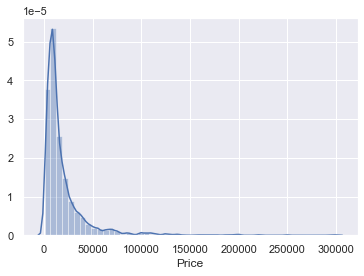

In [10]:
#probability distribution function - histogram

sns.distplot(df_no_mv['Price'])

In [11]:
#Price - exponential hence problem for regression
#skewed to right with max of $300k - few outliers with Price variable
#remove top 1% of observation via quantile 

q = df_no_mv['Price'].quantile(.99)

df_1 = df_no_mv[df_no_mv['Price'] <= q]

df_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


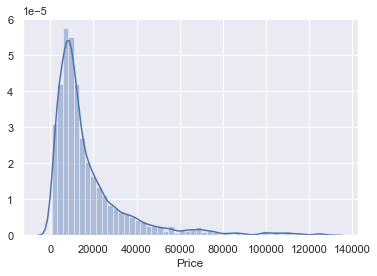

In [12]:
#Price max now $129.2k - much closer

sns.distplot(df_1['Price']) #less outliers

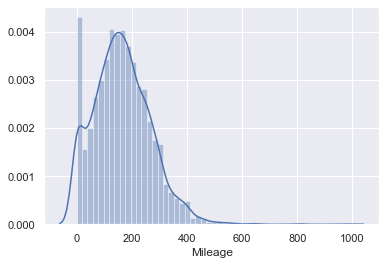

In [14]:
#mileage

sns.distplot(df_1['Mileage'])

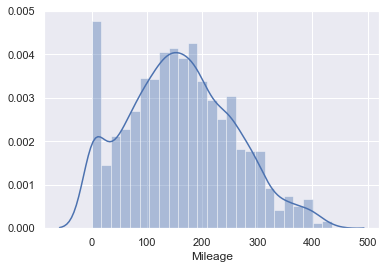

In [15]:
#keep only 99%

q = df_1['Mileage'].quantile(0.99)
df_2 = df_1[df_1['Mileage']<= q]
sns.distplot(df_2['Mileage'])

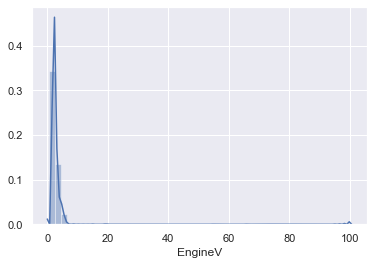

In [16]:
#engine volume

sns.distplot(df_2['EngineV'])

In [19]:
#very skewed to the right
df_2['EngineV'].value_counts().sort_index(ascending=False).head(20)

99.99     7
90.00     1
75.00     1
74.00     1
66.00     1
55.00     1
30.00     1
28.00     1
22.00     1
20.00     2
19.00     2
15.00     1
9.00      1
7.20      1
6.50      1
6.30     13
6.20      3
6.00     11
5.70      7
5.50     44
Name: EngineV, dtype: int64

In [20]:
#outliers - e.g. 99.99, 90, etc
#based on research, engine volume is generally, should be between 0.6 and 6.5

df_2['EngineV'].value_counts().sort_index(ascending=True).head(10)

0.60      1
0.65      1
1.00     16
1.10      3
1.20     28
1.30     33
1.33      2
1.39      2
1.40    138
1.46      1
Name: EngineV, dtype: int64

In [25]:
#outliers above 6.5

df_3 = df_2.loc[df_2['EngineV'] <= 6.5]

In [26]:
df_3.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


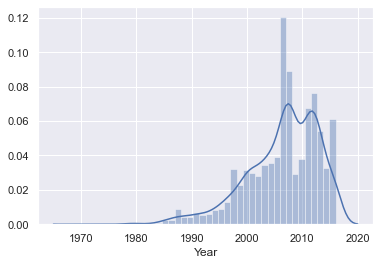

In [27]:
#check Year

sns.distplot(df_3['Year'])

In [28]:
#skewed to the left with mean 2006 
#outliers - older cars 
#remove first 1%

q = df_3['Year'].quantile(0.01)
df_4 = df_3.loc[df_3['Year'] >= q]

In [29]:
df_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3886,3886.000000,3886,3886.000000,3886.000000,3886,3886,3886.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,853,NaN,1477,NaN,NaN,1808,3524,NaN
mean,NaN,18125.889529,NaN,161.022131,2.448649,NaN,NaN,2006.618888
std,NaN,19071.313150,NaN,95.790930,0.950406,NaN,NaN,6.234346
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1987.000000
25%,NaN,7177.250000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21537.500000,NaN,226.750000,3.000000,NaN,NaN,2012.000000


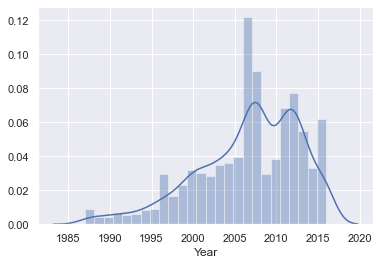

In [30]:
sns.distplot(df_4['Year'])

In [31]:
df_cleaned = df_4.reset_index(drop=True)
df_cleaned.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
3881,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3882,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3883,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3884,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
3885,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013


In [32]:
df_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3881,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3882,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3883,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3884,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


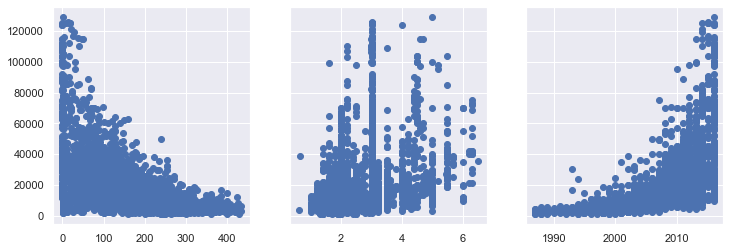

In [37]:
#check OLS assumptions
#check scatter plots 

#Price - dependent 
#Mileage, EngineV, Year - independent continuous

f, (ax1, ax2, ax3) = plt.subplots(nrows =1, ncols=3, sharey=True, figsize=(12,4))
ax1.scatter(df_cleaned['Mileage'], df_cleaned['Price'])
ax2.scatter(df_cleaned['EngineV'], df_cleaned['Price'])
ax3.scatter(df_cleaned['Year'], df_cleaned['Price'])

Based on the result, 1st and 3rd are definitely exponential hence can't use general linear regression
- first transform one or more variables 
- based on the price distplot - not normally distributed with skewness
- use log transformation are useful when facing exponential relationships



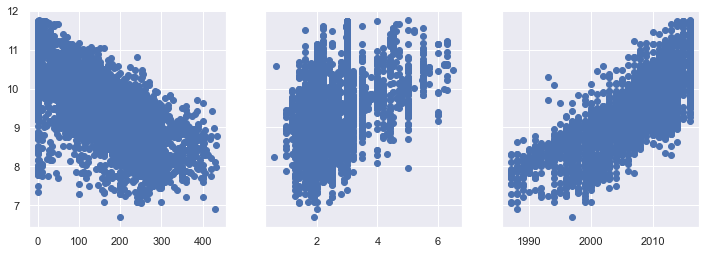

In [38]:
f, (ax1, ax2, ax3) = plt.subplots(nrows =1, ncols=3, sharey=True, figsize=(12,4))
ax1.scatter(df_cleaned['Mileage'], np.log(df_cleaned['Price']))
ax2.scatter(df_cleaned['EngineV'], np.log(df_cleaned['Price']))
ax3.scatter(df_cleaned['Year'], np.log(df_cleaned['Price']))

In [39]:
log_price = np.log(df_cleaned['Price'])

In [41]:
#append log_price to the dataframe

df_cleaned['Price'] = log_price

In [44]:
df_cleaned.rename(columns={'Price':'Log_Price'}, inplace=True)

In [45]:
df_cleaned.head()

,Brand,Log_Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,8.342840,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,8.974618,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,9.495519,sedan,358,5.0,Gas,yes,2003
3,Audi,10.043249,crossover,240,4.2,Petrol,yes,2007
4,Toyota,9.814656,crossover,120,2.0,Petrol,yes,2011


using np.log(x), linear patters is now visible
- log transformation - deal with heteroskedasticity 


### Multicolinearity check

In [46]:
#VIF variance_inflation_factor to test multicolinearity (statsmodel)
#higher the VIF - less reliable 
#1 no multicolinearity
#1<x<5 = moderate
#x>10 = high multicolinearity + concern

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_cleaned[['Mileage','EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [47]:
vif

,VIF,features
0,3.798328,Mileage
1,7.638434,EngineV
2,10.368240,Year


In [48]:
df_no_multico = df_cleaned.drop('Year', axis=1)

In [49]:
df_no_multico.head()

,Brand,Log_Price,Body,Mileage,EngineV,Engine Type,Registration
0,BMW,8.342840,sedan,277,2.0,Petrol,yes
1,Mercedes-Benz,8.974618,van,427,2.9,Diesel,yes
2,Mercedes-Benz,9.495519,sedan,358,5.0,Gas,yes
3,Audi,10.043249,crossover,240,4.2,Petrol,yes
4,Toyota,9.814656,crossover,120,2.0,Petrol,yes


### Dummy Variables - Categorical Variables

In [51]:
df_dummies = pd.get_dummies(df_no_multico, drop_first=True)
df_dummies.head()

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [52]:
data_preprocessed = df_dummies.copy()

In [53]:
data_preprocessed

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3882,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3883,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3884,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [54]:
data_preprocessed.columns.to_list()

['Log_Price',
 'Mileage',
 'EngineV',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes']

In [55]:
variables = data_preprocessed[['Mileage',
 'EngineV',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes']]

vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif1['features'] = variables.columns

In [56]:
vif1

,VIF,features
0,4.450830,Mileage
1,7.815538,EngineV
2,2.282595,Brand_BMW
3,2.860079,Brand_Mercedes-Benz
4,1.635972,Brand_Mitsubishi
5,2.086553,Brand_Renault
6,2.155068,Brand_Toyota
7,2.841286,Brand_Volkswagen
8,1.482474,Body_hatch
9,1.533513,Body_other


VIF would have been "inf" if for dummy variables, the first features weren't dropped
hence when creating dummy variables, need to drop the first

### Linear Regression 

In [57]:
targets = data_preprocessed['Log_Price']
inputs = data_preprocessed.drop('Log_Price', axis=1)

In [58]:
#data scaling - standardize all input variables (independent)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
scaler.fit(inputs)

StandardScaler()

In [60]:
inputs_scaled = scaler.transform(inputs)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled,targets, random_state=365, test_size=0.2)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
reg = LinearRegression()

In [68]:
reg.fit(X_train,y_train)

LinearRegression()

In [69]:
#plot predicted against observed values 
y_hat = reg.predict(X_train)

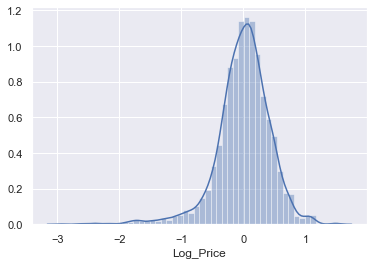

In [73]:
sns.distplot((y_train - y_hat))  #residuals

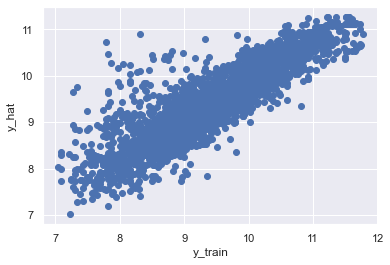

In [74]:
plt.scatter(y_train, y_hat)
plt.xlabel('y_train')
plt.ylabel('y_hat')
plt.show()

In [75]:
reg.score(X_train,y_train)

0.7531480382041298

In [76]:
import statsmodels.api as sm

In [77]:
x_ = sm.add_constant(X_train)
result = sm.OLS(y_train, x_).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     554.6
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:06:13   Log-Likelihood:                -1853.4
No. Observations:                3108   AIC:                             3743.
Df Residuals:                    3090   BIC:                             3851.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4160      0.008   1191.096      0.000       9.401       9.432
x1            -0.4688      0.009    -52.813      0.000      -0.486      -0.451
x2             0.2153      0.010     22.042      0.000       0.196       0.234
x3             0.0369      0.012      3.149      0.002       0.014       0.060
x4             0.0212      0.012      1.712      0.087      -0.003       0.046
x5            -0.1274      0.011    -12.083      0.000      -0.148      -0.107
x6            -0.1760      0.012    -15.003      0.000      -0.199      -0.153
x7            -0.0473      0.012     -4.101      0.000      -0.070      -0.025
x8            -0.0831      0.013     -6.386      0.000      -0.109      -0.058
x9            -0.1386      0.010    -13.834      0.000      -0.158      -0.119
x10           -0.0936      0.010     -9.773      0.000      -0.112      -0.075
x11           -0.1841      0.012    -15.415      0.000      -0.207      -0.161
x12           -0.1199      0.010    -11.492      0.000      -0.140      -0.099
x13           -0.1484      0.012    -12.491      0.000      -0.172      -0.125
x14           -0.1261      0.009    -13.313      0.000      -0.145      -0.107
x15           -0.0360      0.008     -4.551      0.000      -0.052      -0.021
x16           -0.1604      0.010    -16.138      0.000      -0.180      -0.141
x17            0.3192      0.009     36.805      0.000       0.302       0.336
==============================================================================
Omnibus:                      737.362   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3028.818
Skew:                          -1.105   Prob(JB):                         0.00
Kurtosis:                       7.302   Cond. No.                         4.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
result_summary = result.summary()

In [95]:
summary_html = result_summary.tables[1].as_html()
summary_table1 = pd.read_html(summary_html, header=0, index_col=0)[0]

In [96]:
summary_table1

,coef,std err,t,P>|t|,[0.025,0.975]
const,9.4160,0.008,1191.096,0.000,9.401,9.432
x1,-0.4688,0.009,-52.813,0.000,-0.486,-0.451
x2,0.2153,0.010,22.042,0.000,0.196,0.234
x3,0.0369,0.012,3.149,0.002,0.014,0.060
x4,0.0212,0.012,1.712,0.087,-0.003,0.046
x5,-0.1274,0.011,-12.083,0.000,-0.148,-0.107
x6,-0.1760,0.012,-15.003,0.000,-0.199,-0.153
x7,-0.0473,0.012,-4.101,0.000,-0.070,-0.025
x8,-0.0831,0.013,-6.386,0.000,-0.109,-0.058
x9,-0.1386,0.010,-13.834,0.000,-0.158,-0.119


In [100]:
input_list = ['const','Mileage',
 'EngineV',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes' ]

In [97]:
summary_table1
        

,coef,std err,t,P>|t|,[0.025,0.975]
const,9.4160,0.008,1191.096,0.000,9.401,9.432
x1,-0.4688,0.009,-52.813,0.000,-0.486,-0.451
x2,0.2153,0.010,22.042,0.000,0.196,0.234
x3,0.0369,0.012,3.149,0.002,0.014,0.060
x4,0.0212,0.012,1.712,0.087,-0.003,0.046
x5,-0.1274,0.011,-12.083,0.000,-0.148,-0.107
x6,-0.1760,0.012,-15.003,0.000,-0.199,-0.153
x7,-0.0473,0.012,-4.101,0.000,-0.070,-0.025
x8,-0.0831,0.013,-6.386,0.000,-0.109,-0.058
x9,-0.1386,0.010,-13.834,0.000,-0.158,-0.119


In [104]:
new_index_name= {i:j for i,j in zip(summary_table1.index, input_list)}

In [107]:
summary_table1.rename(index=new_index_name)

,coef,std err,t,P>|t|,[0.025,0.975]
const,9.4160,0.008,1191.096,0.000,9.401,9.432
Mileage,-0.4688,0.009,-52.813,0.000,-0.486,-0.451
EngineV,0.2153,0.010,22.042,0.000,0.196,0.234
Brand_BMW,0.0369,0.012,3.149,0.002,0.014,0.060
Brand_Mercedes-Benz,0.0212,0.012,1.712,0.087,-0.003,0.046
Brand_Mitsubishi,-0.1274,0.011,-12.083,0.000,-0.148,-0.107
Brand_Renault,-0.1760,0.012,-15.003,0.000,-0.199,-0.153
Brand_Toyota,-0.0473,0.012,-4.101,0.000,-0.070,-0.025
Brand_Volkswagen,-0.0831,0.013,-6.386,0.000,-0.109,-0.058
Body_hatch,-0.1386,0.010,-13.834,0.000,-0.158,-0.119


In [109]:
summary_table1

,coef,std err,t,P>|t|,[0.025,0.975]
const,9.4160,0.008,1191.096,0.000,9.401,9.432
x1,-0.4688,0.009,-52.813,0.000,-0.486,-0.451
x2,0.2153,0.010,22.042,0.000,0.196,0.234
x3,0.0369,0.012,3.149,0.002,0.014,0.060
x4,0.0212,0.012,1.712,0.087,-0.003,0.046
x5,-0.1274,0.011,-12.083,0.000,-0.148,-0.107
x6,-0.1760,0.012,-15.003,0.000,-0.199,-0.153
x7,-0.0473,0.012,-4.101,0.000,-0.070,-0.025
x8,-0.0831,0.013,-6.386,0.000,-0.109,-0.058
x9,-0.1386,0.010,-13.834,0.000,-0.158,-0.119


In [111]:
new_col = {i:j for i,j in zip(summary_table1.index, input_list)}
new_col

{'const': 'const',
 'x1': 'Mileage',
 'x2': 'EngineV',
 'x3': 'Brand_BMW',
 'x4': 'Brand_Mercedes-Benz',
 'x5': 'Brand_Mitsubishi',
 'x6': 'Brand_Renault',
 'x7': 'Brand_Toyota',
 'x8': 'Brand_Volkswagen',
 'x9': 'Body_hatch',
 'x10': 'Body_other',
 'x11': 'Body_sedan',
 'x12': 'Body_vagon',
 'x13': 'Body_van',
 'x14': 'Engine Type_Gas',
 'x15': 'Engine Type_Other',
 'x16': 'Engine Type_Petrol',
 'x17': 'Registration_yes'}

In [112]:
summary_table1.rename(index=new_col, inplace=True)

In [113]:
summary_table1

,coef,std err,t,P>|t|,[0.025,0.975]
const,9.4160,0.008,1191.096,0.000,9.401,9.432
Mileage,-0.4688,0.009,-52.813,0.000,-0.486,-0.451
EngineV,0.2153,0.010,22.042,0.000,0.196,0.234
Brand_BMW,0.0369,0.012,3.149,0.002,0.014,0.060
Brand_Mercedes-Benz,0.0212,0.012,1.712,0.087,-0.003,0.046
Brand_Mitsubishi,-0.1274,0.011,-12.083,0.000,-0.148,-0.107
Brand_Renault,-0.1760,0.012,-15.003,0.000,-0.199,-0.153
Brand_Toyota,-0.0473,0.012,-4.101,0.000,-0.070,-0.025
Brand_Volkswagen,-0.0831,0.013,-6.386,0.000,-0.109,-0.058
Body_hatch,-0.1386,0.010,-13.834,0.000,-0.158,-0.119


In [117]:
reg_summary = summary_table1[['coef']]
reg_summary.rename(columns={'coef':'weights'}, inplace=True)

C:\Users\byulc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [118]:
reg_summary

,weights
const,9.4160
Mileage,-0.4688
EngineV,0.2153
Brand_BMW,0.0369
Brand_Mercedes-Benz,0.0212
Brand_Mitsubishi,-0.1274
Brand_Renault,-0.1760
Brand_Toyota,-0.0473
Brand_Volkswagen,-0.0831
Body_hatch,-0.1386


continuous variables
Positive weights: feature increases in value, so do log_price and 'price' respectively - e.g. engineV
Negative weights: feature decreases in value, price of car decreases - e.g. mileage

dummy variables
compares against the dropped dummy feature was the benchmark (e.g. Audi)
- positive weight: respective category (Brand) is more expensive than the benchmark (BMW vs. Audi)
- negative weight: respective category (Brand) is less expensive than the benchmark (Toyota vs. Audi)

In [121]:
df_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Test

In [123]:
y_hat_test = reg.predict(X_test)

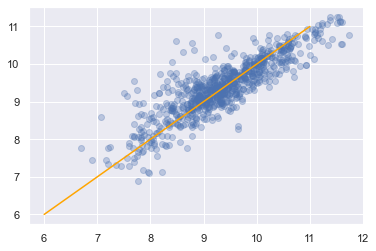

In [128]:
plt.scatter(y_test, y_hat_test, alpha=0.3)
plt.plot(range(6,12), range(6,12), color='orange')

1. higher price more along the regression line
2. lower price more scattered 
3. more saturated the color, more concentration
